This is the example of using EM-algorithm to impute missing data. <br> In this case we use the data of air pollution, and the goal is to perform regression analysis to predict the value of PM2.5.<br>
To simulate the condition of a dataset with missing values, we will pick random rows and replace some features with NaN.<br>
In the end we will compare the R-squared value of EM-algorithm, original data and baseline method(KNN) as a metric.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.impute import KNNImputer
import utils
from continuous import *

Read the data and do some preprocessing.

In [2]:
truth_df = pd.read_csv("./data/original.csv")
X = truth_df.drop('PM2.5',axis=1)
display(X)
missing_result = utils.simulate_nan(X, nan_rate=0.6)
missing_df = missing_result['X']

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
0,16.0,2.0,0.53,0.18,-0.30,16.0,16.0,106.0,77.0,2.6
1,16.0,2.0,0.56,0.19,0.00,23.0,23.0,106.0,77.0,3.8
2,16.0,2.0,0.56,0.20,0.10,23.0,23.0,107.0,79.0,3.6
3,16.0,2.1,0.61,0.22,1.72,19.2,20.9,108.0,80.0,3.7
4,16.0,2.1,0.67,0.19,-0.40,19.0,18.0,105.0,80.0,3.6
...,...,...,...,...,...,...,...,...,...,...
8779,20.0,1.9,0.30,0.09,1.30,12.0,13.0,63.0,86.0,1.7
8780,20.0,1.9,0.28,0.09,1.40,13.0,14.0,55.0,87.0,1.6
8781,20.0,2.0,0.33,0.11,1.30,14.0,16.0,50.0,89.0,1.5
8782,19.0,2.0,0.37,0.12,1.30,19.0,20.0,52.0,89.0,1.6


Check the simulated dataframe with missing values. We set the portion of missing values to be 0.2

In [3]:
display(missing_df)
print(missing_result['nan_rate_actual'])

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
0,NaN,NaN,0.53,0.18,NaN,16.0,16.0,NaN,NaN,NaN
1,NaN,NaN,NaN,0.19,NaN,NaN,NaN,NaN,77.0,3.8
2,NaN,2.0,0.56,NaN,NaN,NaN,23.0,NaN,NaN,NaN
3,16.0,NaN,0.61,NaN,1.72,19.2,20.9,NaN,NaN,NaN
4,NaN,NaN,0.67,0.19,-0.40,19.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8779,NaN,NaN,NaN,NaN,NaN,12.0,13.0,63.0,NaN,NaN
8780,NaN,NaN,0.28,0.09,NaN,13.0,14.0,NaN,87.0,1.6
8781,20.0,NaN,0.33,0.11,NaN,NaN,NaN,NaN,89.0,1.5
8782,NaN,NaN,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0.5949225865209472


Implement imputation. We set maximum iteration to be 3000 times, and the criteria of eps to be 0.00001

In [5]:
result_imputed = utils.impute_em(missing_df, 3000, 1e-05)

The imputed data

In [6]:
result_imputed['X_imputed']

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
0,22.076911,1.884615,0.530000,0.180000,0.050819,16.000000,16.000000,74.884791,76.061442,3.121366
1,24.855701,1.838066,0.407353,0.190000,3.308020,14.531860,17.836904,59.385111,77.000000,3.800000
2,21.631306,2.000000,0.560000,0.245153,4.034237,18.983725,23.000000,77.426533,79.560190,3.419643
3,16.000000,1.963470,0.610000,0.209722,1.720000,19.200000,20.900000,80.427979,80.576160,3.091401
4,19.645595,1.950154,0.670000,0.190000,-0.400000,19.000000,18.580916,91.077290,75.871463,3.401368
...,...,...,...,...,...,...,...,...,...,...
8779,25.022254,1.813323,0.359682,0.148937,1.011478,12.000000,13.000000,63.000000,74.913965,2.800357
8780,22.972460,1.841352,0.280000,0.090000,1.000102,13.000000,14.000000,43.946807,87.000000,1.600000
8781,20.000000,1.860011,0.330000,0.110000,1.792542,12.612527,14.422652,45.139613,89.000000,1.500000
8782,25.192747,1.809777,0.370000,0.175973,2.714052,12.532784,15.250699,53.951371,76.226004,2.869677


Check how many E-step & M-step are iterated, and check if there's still NaN values.

In [7]:
# There's no NaN
print("Count of NaN values: \n", np.isnan(result_imputed['X_imputed']).sum())
print("The iterations count is: ", result_imputed['iteration'])

Count of NaN values: 
 AMB_TEMP    0
CH4         0
CO          0
NMHC        0
NO          0
NO2         0
NOx         0
PM10        0
RH          0
SO2         0
dtype: int64
The iterations count is:  547


Regression analysis on imputed data (EM)

In [8]:
imputed_df = result_imputed['X_imputed']
# display(X)
X = sm.add_constant(imputed_df)
y= truth_df['PM2.5'].values
model = sm.OLS(y,X).fit()
print(f"R-squared is: {model.rsquared:.4f} ")
print(f"Adj R-squared is: {model.rsquared_adj:.4f} ")

R-squared is: 0.4862 
Adj R-squared is: 0.4856 


Regression analysis on Original data

In [9]:
truth_X = truth_df.drop("PM2.5",axis=1)
truth_X = sm.add_constant(truth_X)
y= truth_df['PM2.5'].values
model = sm.OLS(y,truth_X).fit()
print(f"R-squared is: {model.rsquared:.4f} ")
print(f"Adj R-squared is: {model.rsquared_adj:.4f} ")

R-squared is: 0.7642 
Adj R-squared is: 0.7639 


Regression analysis on imputed data (KNN)

In [10]:
imputer = KNNImputer(n_neighbors=3)
knn_X = imputer.fit_transform(missing_df)
knn_X_df = pd.DataFrame(knn_X, columns=missing_df.columns)
knn_X = sm.add_constant(knn_X)
y=truth_df['PM2.5'].values
model = sm.OLS(y,knn_X).fit()
print(f"R-squared is: {model.rsquared:.4f} ")
print(f"Adj R-squared is: {model.rsquared_adj:.4f} ")

R-squared is: 0.3536 
Adj R-squared is: 0.3529 


Based on KNN and EM algorithm, compare the imputed data. <br>
Note: The input should be dataFrame


*** Entropy ***


Entropy,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
entropy_before,3.08e+00,-6.08e-01,-5.45e-01,-7.35e-01,2.53e+00,3.23e+00,3.52e+00,4.61e+00,3.67e+00,1.54e+00
entropy_after,2.84e+00,-5.50e-01,-4.65e-01,-6.65e-01,2.54e+00,3.34e+00,3.62e+00,4.56e+00,3.45e+00,1.49e+00
difference,2.40e-01,5.76e-02,7.97e-02,7.01e-02,1.40e-02,1.08e-01,9.41e-02,4.97e-02,2.25e-01,4.70e-02
percentage_difference,-7.78e-02,-9.48e-02,-1.46e-01,-9.53e-02,5.55e-03,3.33e-02,2.67e-02,-1.08e-02,-6.12e-02,-3.05e-02



*** KL Divergence(Relatice Entropy) ***


KL-Diverge,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
js_entropy,8.96e-02,3.62e-03,1.40e-02,6.30e-03,6.85e-03,1.15e-02,7.11e-03,9.55e-03,2.03e-02,6.41e-03
KL(1||2),3.28e-01,4.08e-03,3.37e-02,1.25e-02,6.03e-03,2.26e-02,9.99e-03,2.17e-02,6.16e-02,6.20e-03
KL(2||1),2.10e-01,4.44e-03,3.92e-02,1.41e-02,6.20e-03,2.71e-02,1.14e-02,1.97e-02,4.54e-02,5.71e-03



*** Basic Info ***


Basic Info Before,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
min,2.23e+01,1.81e+00,3.97e-01,1.56e-01,2.30e+00,1.33e+01,1.54e+01,5.77e+01,7.67e+01,2.74e+00
max,3.60e+01,2.70e+00,2.37e+00,1.43e+00,5.30e+01,4.60e+01,1.13e+02,2.30e+02,9.80e+01,1.30e+01
avg,2.23e+01,1.81e+00,3.97e-01,1.56e-01,2.30e+00,1.33e+01,1.54e+01,5.77e+01,7.67e+01,2.74e+00
q1,1.83e+01,1.70e+00,3.10e-01,9.00e-02,7.00e-01,9.30e+00,1.00e+01,3.93e+01,7.03e+01,2.00e+00
q3,2.70e+01,1.87e+00,4.80e-01,1.87e-01,2.63e+00,1.70e+01,1.96e+01,7.17e+01,8.37e+01,3.27e+00
std,5.28e+00,1.32e-01,1.40e-01,1.16e-01,3.04e+00,6.13e+00,8.19e+00,2.44e+01,9.51e+00,1.13e+00
skewness,3.10e-01,1.20e+00,7.24e-01,2.88e+00,4.73e+00,3.80e-01,1.43e+00,9.64e-01,-6.10e-01,1.51e+00
kurtosis,-7.93e-01,3.71e+00,6.03e+00,1.47e+01,4.00e+01,4.61e-01,5.62e+00,2.68e+00,4.63e-01,5.43e+00


Basic Info After,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
min,2.53e+01,1.80e+00,3.62e-01,1.72e-01,2.63e+00,1.22e+01,1.49e+01,5.32e+01,7.61e+01,2.84e+00
max,3.73e+01,2.74e+00,2.37e+00,1.43e+00,5.30e+01,7.61e+01,1.13e+02,2.30e+02,1.24e+02,1.30e+01
avg,2.53e+01,1.80e+00,3.62e-01,1.72e-01,2.63e+00,1.22e+01,1.49e+01,5.32e+01,7.61e+01,2.84e+00
q1,2.31e+01,1.70e+00,2.55e-01,9.00e-02,9.70e-01,7.43e+00,8.66e+00,3.71e+01,7.22e+01,2.20e+00
q3,2.80e+01,1.89e+00,4.49e-01,2.20e-01,3.35e+00,1.60e+01,1.91e+01,6.44e+01,8.06e+01,3.30e+00
std,4.15e+00,1.40e-01,1.52e-01,1.24e-01,3.08e+00,6.83e+00,9.00e+00,2.32e+01,7.59e+00,1.08e+00
skewness,-8.03e-01,1.19e+00,1.14e+00,2.27e+00,4.51e+00,1.04e+00,1.58e+00,1.44e+00,-5.70e-01,1.55e+00
kurtosis,1.35e+00,3.00e+00,5.04e+00,1.04e+01,3.86e+01,2.85e+00,6.08e+00,4.57e+00,2.65e+00,6.45e+00



*** Covarience ***


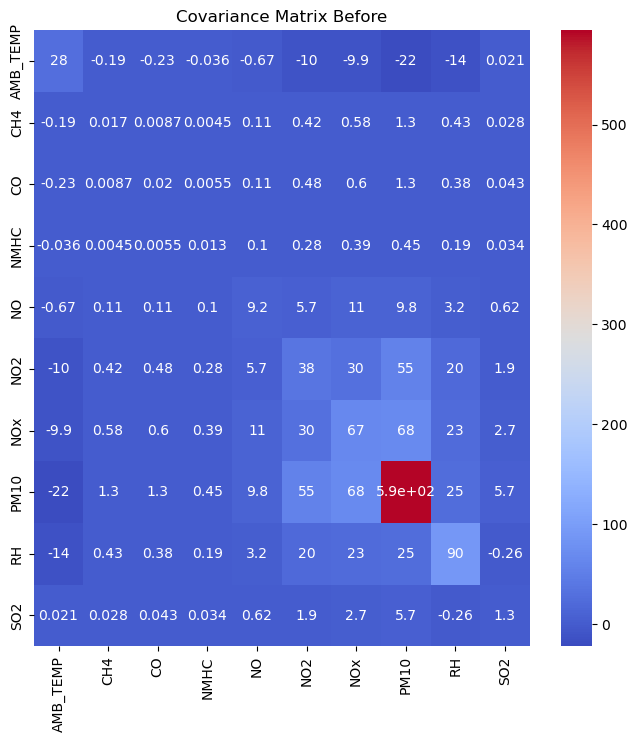

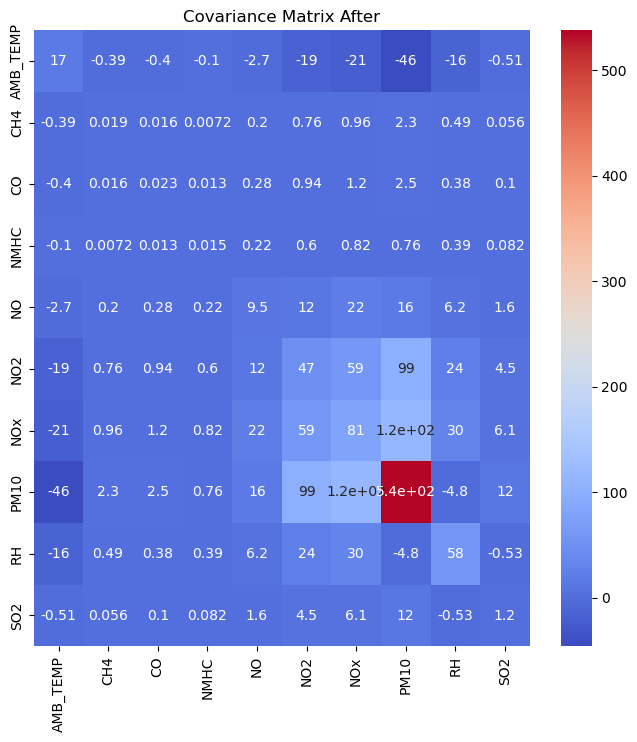


*** Pairplot ***


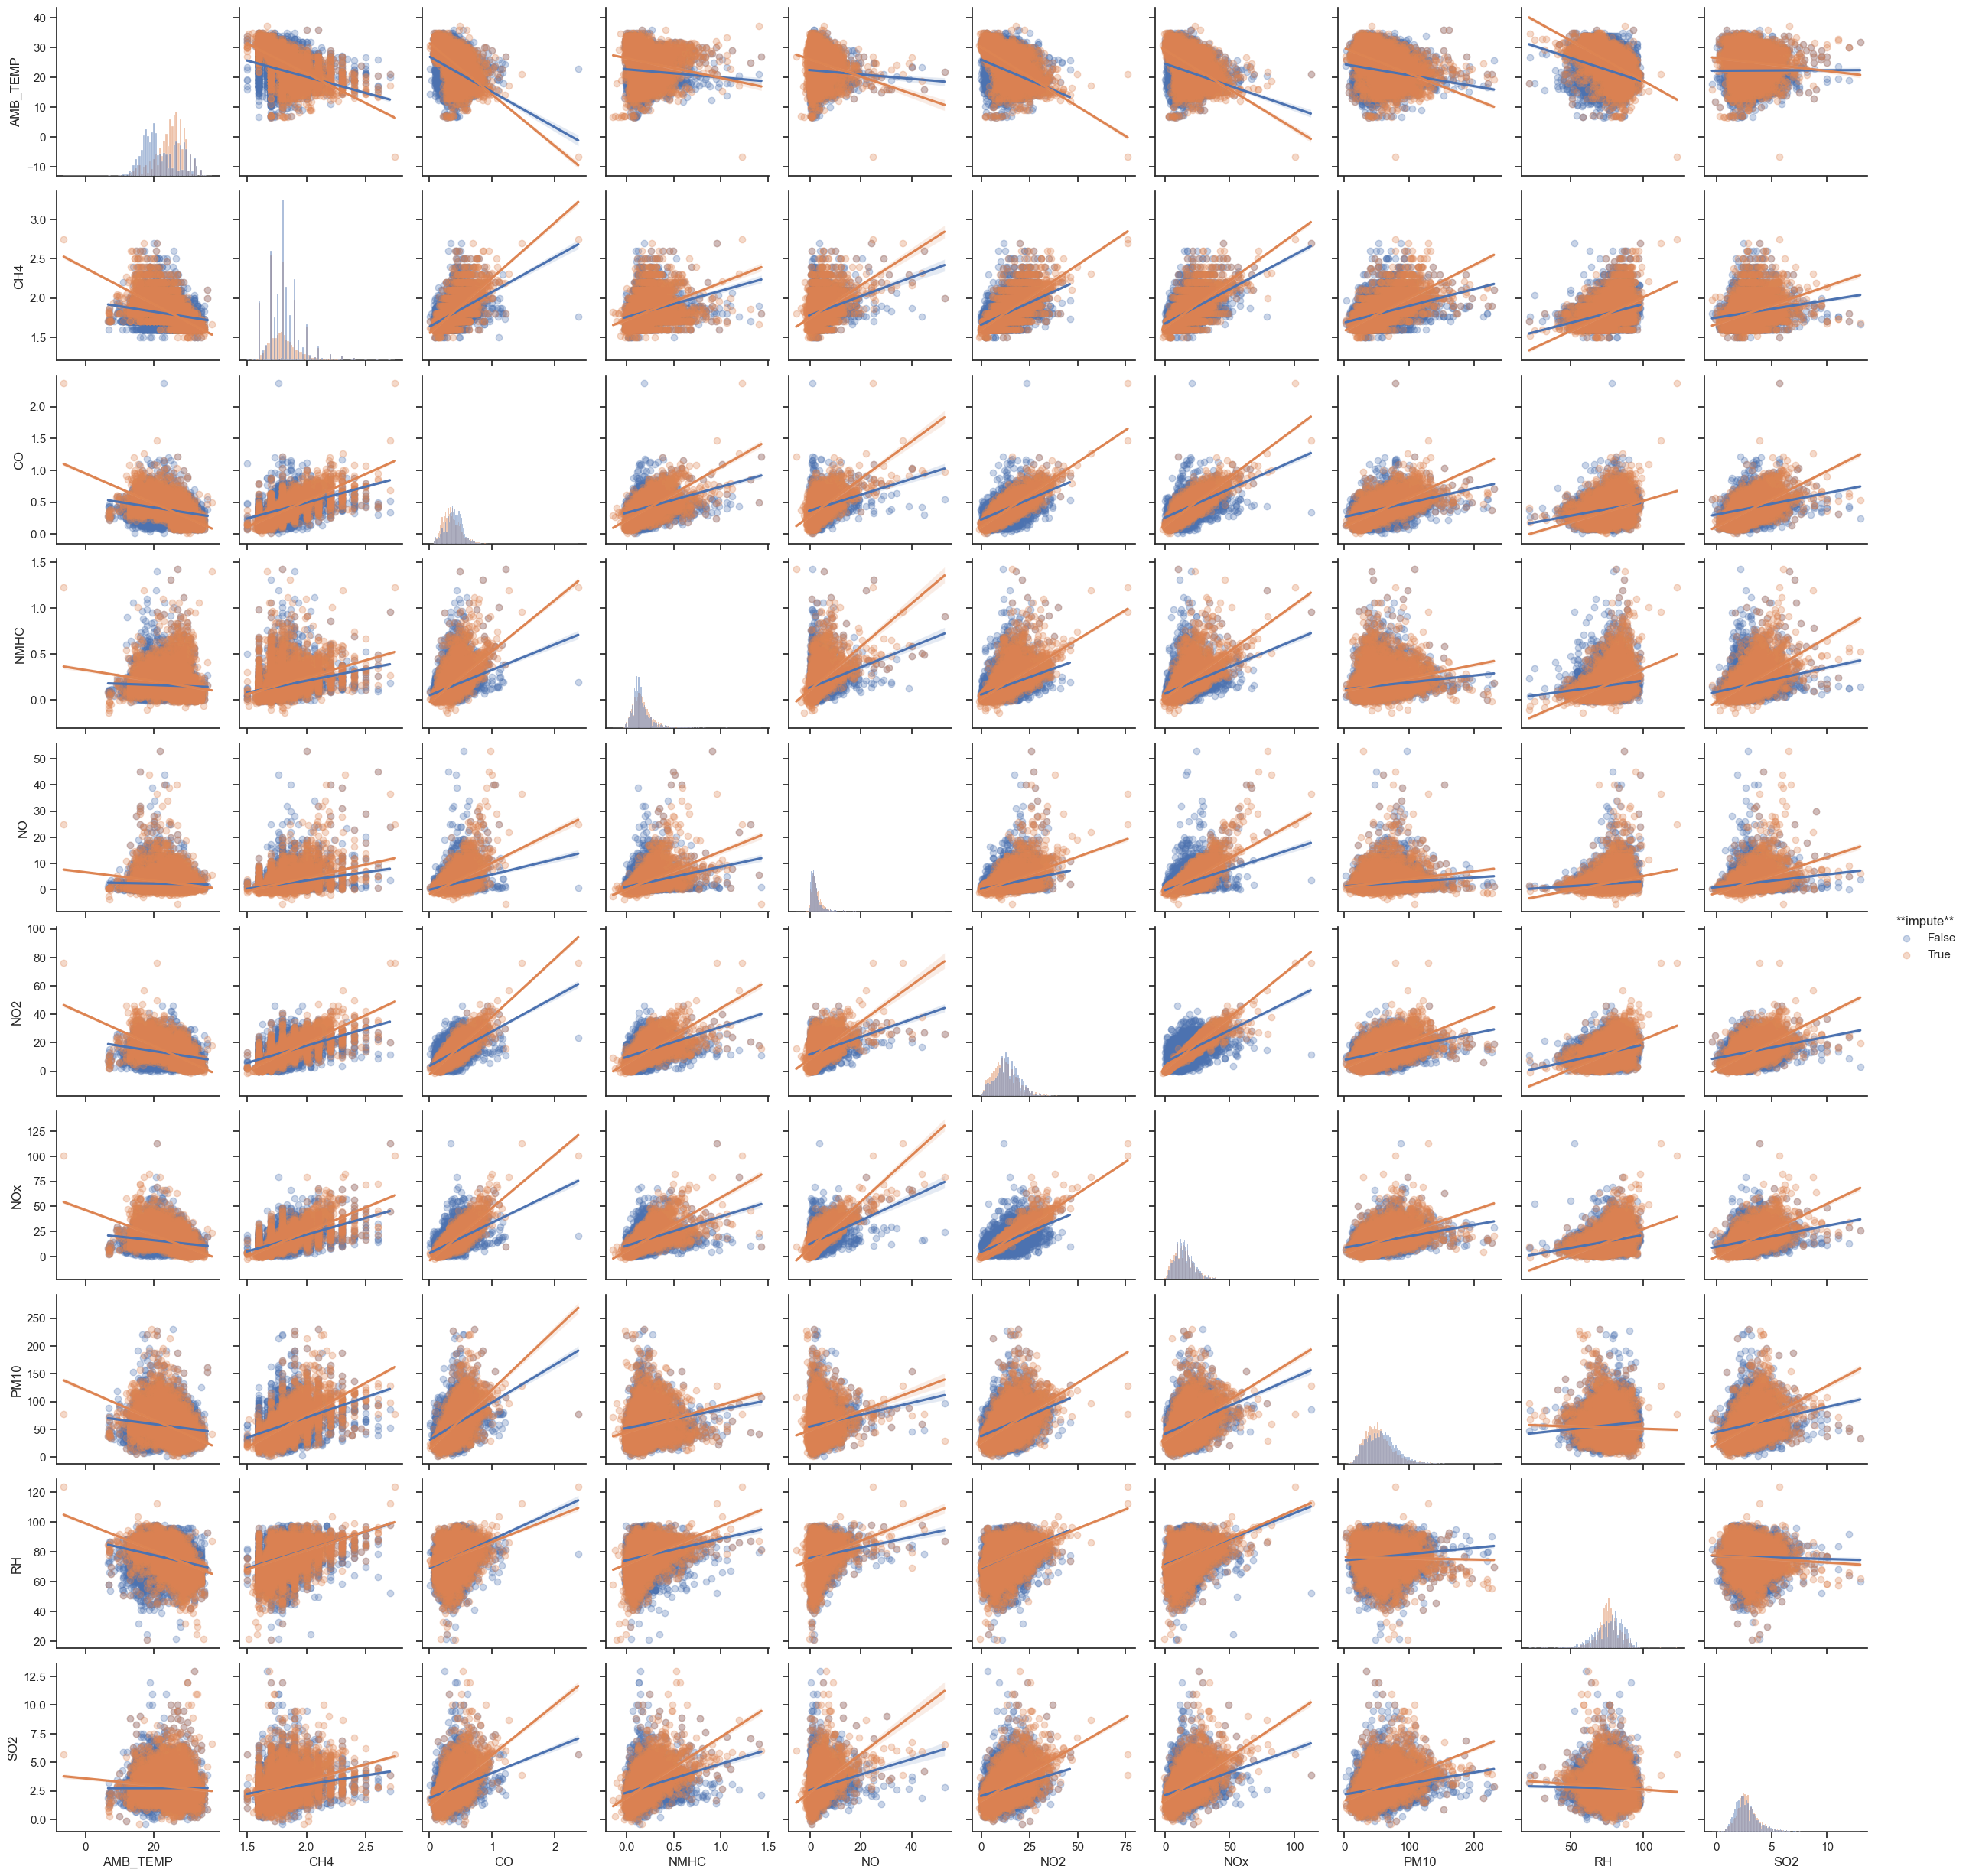

In [11]:
con = continuous()
frame = con.comparison(knn_X_df, result_imputed['X_imputed'])